In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from string import punctuation
print(punctuation)
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


clean the original data

In [2]:
df = pd.read_csv("SET_processed_latest_version.csv")
for i in range(df.shape[1]):
    df.iloc[:,i]= df.iloc[:,i].replace([555, 777,888,999,'555','777','888','999' ], np.nan)
text=df.loc[:,['GRYD_ETO_ID','S6b_Other_Activities','S11a_Comments','A1_Description','A2_Description','A3_Description','O1_other_group_name','Group_name_part1','PUSH_1','PULL_1']]
text["text_all"] = text.apply(lambda x: ','.join(x.dropna()), axis=1)


normalize function

In [3]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [4]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

def  normalize (df):
    contents=df.dropna().values
    

    
    
    for i in range (contents.shape[0]):
        contents[i]=contents[i].replace(",", " ")
        
    all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]
    all_contents = [i.lower() for i in all_contents]
    all_contents= [i.split() for i in all_contents]
    
    for i in range (len(all_contents)):
        all_contents[i]=remove_noise(all_contents[i],sw)
    
    
    clean_tokens = [[] for _ in range(len(all_contents))]
    other_trash = ['im','a','u','2','wont','thats','dont', 'cant', 'didnt','isnt','ive','doesnt']
    trash_tokens = sw + other_trash
    for i in range(len(all_contents)):
        for token in all_contents[i]:
            if token not in trash_tokens:
                clean_tokens[i].append(token)
       
    

    
    return clean_tokens

In [5]:
original = normalize(text['S11a_Comments'])

combine data + sample data exploration

In [6]:
df=pd.read_csv("tweet_dataset.csv")

In [7]:
df=df.loc[:,['sentiment','selected_text']]

In [8]:
df1=pd.read_csv('data_train.csv')

In [9]:
df2=pd.read_csv('data_test.csv')

In [10]:
df.shape

(40000, 2)

In [11]:
dfnew=pd.concat([df1, df2], ignore_index=True)

In [12]:
dfnew=dfnew.rename(columns={'Emotion':'sentiment','Text':'selected_text'})

In [13]:
df=pd.concat([df, dfnew], ignore_index=True)

In [14]:
df.shape

(51327, 2)

seperate to train_test

In [15]:
df.sample(frac=1)

,sentiment,selected_text
31596,neutral,If you don`t like them I`ll blame the kitties.
49552,sadness,"My dog, whom I had had for eleven years, died...."
12960,worry,only an hour left with my iPod touch
33861,happiness,NaN
26288,happiness,make me happy Perfect running weather!
...,...,...
12525,worry,say a hi to me tom please please
5208,sadness,NaN
40391,sadness,"Hey , Cindy , I ’ m so sorry about yesterday ...."
49823,sadness,I went to the library and lost my bag .


In [16]:
df=pd.concat([df.loc[df['sentiment']=='fear'], df.loc[df['sentiment']=='sadness'],df.loc[df['sentiment']=='neutral'],df.loc[df['sentiment']=='worry'],df.loc[df['sentiment']=='boredom'],df.loc[df['sentiment']=='anger']], ignore_index=True)
df=df.sample(frac=1)
train=df.iloc[:25000,]
train.to_csv('emotion_train.csv',index=False)
test=df.iloc[25000:,]
test.to_csv('emotion_test.csv',index=False)

In [17]:
df.to_csv('emotion.csv', index = False)

.....


In [18]:
fear = normalize(df.loc[df['sentiment']=='fear']['selected_text'])
sadness = normalize(df.loc[df['sentiment']=='sadness']['selected_text'])
neutral = normalize(df.loc[df['sentiment']=='neutral']['selected_text'])
worry = normalize(df.loc[df['sentiment']=='worry']['selected_text'])

boredom = normalize(df.loc[df['sentiment']=='boredom']['selected_text'])
anger = normalize(df.loc[df['sentiment']=='anger']['selected_text'])

In [19]:
boredom[100]

['lose']

most common tokens for sadness categories

In [20]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token
sadness_words = get_all_words(worry)

In [21]:
from nltk import FreqDist

freq_dist_pos = FreqDist(sadness_words)
print(freq_dist_pos.most_common(100))

[('get', 424), ('go', 376), ('good', 283), ('miss', 216), ('sorry', 200), ('day', 193), ('feel', 189), ('work', 185), ('bad', 175), ('like', 173), ('think', 168), ('hope', 153), ('want', 142), ('sad', 142), ('know', 139), ('time', 134), ('today', 134), ('one', 126), ('really', 124), ('need', 122), ('make', 119), ('well', 108), ('sick', 107), ('hurt', 105), ('back', 104), ('wish', 98), ('still', 98), ('lol', 95), ('love', 93), ('see', 91), ('look', 91), ('oh', 90), ('come', 84), ('much', 84), ('home', 83), ('find', 76), ('happy', 75), ('try', 74), ('take', 73), ('night', 73), ('thing', 71), ('sleep', 71), ('suck', 69), ('ill', 68), ('last', 65), ('great', 64), ('say', 64), ('wait', 62), ('right', 61), ('would', 61), ('fun', 60), ('though', 60), ('new', 59), ('gonna', 59), ('leave', 58), ('poor', 57), ('week', 57), ('hate', 56), ('soon', 56), ('tomorrow', 55), ('lose', 54), ('watch', 53), ('thanks', 53), ('hard', 53), ('tire', 52), ('please', 51), ('never', 51), ('way', 50), ('could', 49

change the data type to fit the naive bayes model

In [22]:
def get_tweets_for_model(cleaned_tokens_list):
    
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)



In [23]:
fear_new = get_tweets_for_model(fear)
sadness_new = get_tweets_for_model(sadness)
neutral_new = get_tweets_for_model(neutral)
worry_new = get_tweets_for_model(worry)

boredom_new = get_tweets_for_model(boredom)
anger_new = get_tweets_for_model(anger)

In [24]:
import random
fear_data = [(i, "fear")for i in fear_new]
sadness_data = [(i, "sadness")for i in sadness_new]
neutral_data = [(i, "neutral")for i in neutral_new]
worry_data = [(i, "worry")for i in worry_new]

boredom_data = [(i, "boredom")for i in boredom_new]
anger_data = [(i, "anger")for i in anger_new]

In [25]:
anger_data[0]

({'mr': True, 'friar': True, 'look': True, 'offended': True, 'continue': True},
 'anger')

train test split, fit naive bayes model

In [26]:
dataset = fear_data+ sadness_data +neutral_data+worry_data+boredom_data+anger_data

len(dataset)


24574

In [27]:
random.shuffle(dataset)

train_data = dataset[:20000]
test_data = dataset[20000:]

In [28]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.3546130301705291
Most Informative Features
                   angry = True            anger : neutra =    250.9 : 1.0
                  horror = True             fear : neutra =    153.0 : 1.0
                    fear = True             fear : neutra =    123.7 : 1.0
                frighten = True             fear : neutra =     91.8 : 1.0
                    felt = True             fear : neutra =     87.6 : 1.0
                   anger = True            anger : sadnes =     83.5 : 1.0
              girlfriend = True            anger : neutra =     79.0 : 1.0
                 nervous = True             fear : sadnes =     77.5 : 1.0
                    bore = True           boredo : worry  =     74.1 : 1.0
                cleaning = True           boredo : worry  =     74.1 : 1.0
None


In [29]:
print(classifier.classify(dict([token, True] for token in original[10])))

sadness


add sentiment column to original text df

In [30]:
sentiment=list()
for i in range (len(original)):
    sentiment.append(classifier.classify(dict([token, True] for token in original[i])))

In [87]:
text['sentiment']=np.nan
text=text[text.S11a_Comments.notna()]

In [88]:
text.shape

(991, 12)

In [92]:
emo=pd.read_csv("activities_with_emotion_labels_ruofei.csv")
emo

,S6b_Other_Activities,Unnamed: 1,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,Emotion,S11a_Comments
0,"Working out, CBT, boxing",NaN,School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,fear,"School. Poor grades, car accident, not enough ..."
1,Basketball,NaN,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,sadness,Mother died
2,Extra activities with children,NaN,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,fear,Favor cousin was murder and never found his ki...
3,Actor/dance,NaN,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,sadness,Best friend brother was murder [sic] by 16 and...
4,Singing,NaN,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,sadness,Best fried brother was murder [sic] by 18yr boy
...,...,...,...,...,...,...,...,...,...,...,...
986,NaN,NaN,Friends,NaN,NaN,Friends,No group,NaN,NaN,sadness,friends got shot
987,Wroking out playing basktball,NaN,NaN,NaN,NaN,No other group,Main street,I bang before - I dont want to do it like my o...,the people around right now are putting down I...,fear,Injured
988,Spend time with family,NaN,NaN,NaN,NaN,No other group,Aves Plug,Not really,My son,sadness,Mom left home
989,"Drawing, makeup, video games",NaN,NaN,NaN,NaN,No other group,Group,No,"Yes, work, school",fear,Moving back and forth


In [98]:
text=text.reset_index()

In [101]:
text['sentiment']=emo.Emotion

In [102]:
text

,index,GRYD_ETO_ID,S6b_Other_Activities,S11a_Comments,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,text_all,sentiment,Emotion
0,0,BVCB-0-144-1,"Working out, CBT, boxing","School. Poor grades, car accident, not enough ...",School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,"BVCB-0-144-1,Working out, CBT, boxing,School. ...",fear,fear
1,1,BVCB-0-174-1,Basketball,Mother died,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,"BVCB-0-174-1,Basketball,Mother died,Basketball...",sadness,sadness
2,2,Southeast 3-10-24-1,Extra activities with children,Favor cousin was murder and never found his ki...,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,"Southeast 3-10-24-1,Extra activities with chil...",fear,fear
3,3,Southeast 3-10-18-1,Actor/dance,Best friend brother was murder [sic] by 16 and...,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-18-1,Actor/dance,Best friend br...",sadness,sadness
4,4,Southeast 3-10-17-1,Singing,Best fried brother was murder [sic] by 18yr boy,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-17-1,Singing,Best fried brother...",sadness,sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2749,Rampart 1-12-391-3,NaN,friends got shot,Friends,NaN,NaN,Friends,No group,NaN,NaN,"Rampart 1-12-391-3,friends got shot,Friends,Fr...",sadness,sadness
987,2750,Southeast 1-24-72-1,Wroking out playing basktball,Injured,NaN,NaN,NaN,No other group,Main street,I bang before - I dont want to do it like my o...,the people around right now are putting down I...,"Southeast 1-24-72-1,Wroking out playing basktb...",fear,fear
988,2751,Northeast-25-68-2,Spend time with family,Mom left home,NaN,NaN,NaN,No other group,Aves Plug,Not really,My son,"Northeast-25-68-2,Spend time with family,Mom l...",sadness,sadness
989,2757,Hollenbeck 3-20-298-1,"Drawing, makeup, video games",Moving back and forth,NaN,NaN,NaN,No other group,Group,No,"Yes, work, school","Hollenbeck 3-20-298-1,Drawing, makeup, video g...",fear,fear


In [32]:
temp=0
for i in range (text.shape[0]):
    if (type(text.loc[i,'S11a_Comments'])==str):
        text.loc[i,'sentiment']=sentiment[temp]
        temp=temp+1


In [103]:
text.loc[:,['S11a_Comments','sentiment']].head(10)

,S11a_Comments,sentiment
0,"School. Poor grades, car accident, not enough ...",fear
1,Mother died,sadness
2,Favor cousin was murder and never found his ki...,fear
3,Best friend brother was murder [sic] by 16 and...,sadness
4,Best fried brother was murder [sic] by 18yr boy,sadness
5,Best friend brother was murder [sic] by 22yr m...,sadness
6,My mom going to jail,fear
7,Broke up with my long time boyfriend.,sadness
8,Family member killed,fear
9,Friend was shot,fear


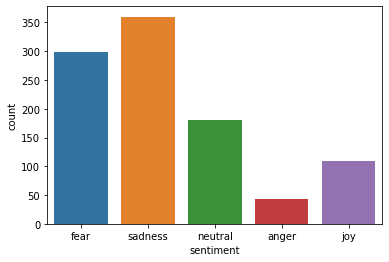

In [104]:
sns.countplot(text['sentiment'])

## correlation finding

inner join two dataframe with key = id, value = sentiment and risk-score

In [112]:
text.shape

(991, 14)

In [124]:
df=pd.read_csv('full_embeddedness.csv')

In [125]:
df.shape
df

,ID,admin,age,sex,zone,gang,family,other,risk
0,BVCB-0-144-1,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776
1,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419
2,Southeast 3-10-24-1,1,NaN,2,21.0,NaN,6.626468,-0.225167,-2.651080
3,Southeast 3-10-18-1,1,25.0,1,21.0,-8.583601,6.626468,-0.225167,-2.073084
4,Southeast 3-10-17-1,1,24.0,2,21.0,-8.583601,6.626468,1.413228,-1.421399
...,...,...,...,...,...,...,...,...,...
2760,Southwest 2-23-280-1,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042
2761,Northeast-25-64-1,1,16.0,1,NaN,NaN,0.584661,NaN,-4.329781
2762,Mission-14-413-1,1,16.0,1,NaN,NaN,5.223674,NaN,2.635519
2763,77th 3-20-376-1,1,14.0,2,NaN,NaN,2.935746,NaN,-2.884790


In [128]:
risk=df.loc[:,['ID','risk']]
risk.head()

,ID,risk
0,BVCB-0-144-1,-5.196776
1,BVCB-0-174-1,9.762419
2,Southeast 3-10-24-1,-2.651080
3,Southeast 3-10-18-1,-2.073084
4,Southeast 3-10-17-1,-1.421399


In [129]:

emotion=text.loc[:,['GRYD_ETO_ID','sentiment']]

In [130]:
emotion=emotion.rename(columns={'GRYD_ETO_ID':'ID'})
emotion.shape

(991, 2)

In [131]:
merged_inner = pd.merge(left=emotion, right=risk, left_on='ID', right_on='ID')

In [132]:
merged_inner.shape

(1559, 3)

In [133]:
df=merged_inner.dropna()

In [134]:
df.shape

(1541, 3)

In [135]:
df=df.rename(columns={'gangid':'ID'})
#df is the final one
df

,ID,sentiment,risk
0,BVCB-0-144-1,fear,-5.196776
1,BVCB-0-174-1,sadness,9.762419
3,Southeast 3-10-24-1,fear,-2.651080
4,Southeast 3-10-18-1,sadness,-2.073084
5,Southeast 3-10-17-1,sadness,-1.421399
...,...,...,...
1554,Rampart 1-12-391-3,sadness,-2.884790
1555,Southeast 1-24-72-1,fear,0.870485
1556,Northeast-25-68-2,sadness,3.560241
1557,Pacific-18-110-2,fear,-0.153241


Text(0, 0.5, 'risk')

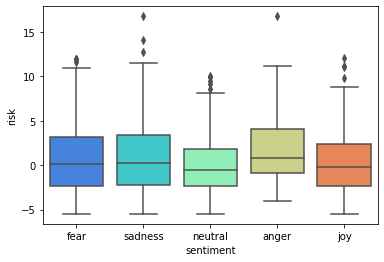

In [139]:
sns.boxplot(x='sentiment',y='risk',data=df,palette='rainbow')
plt.ylabel('risk')

In [47]:
intake=pd.read_csv('full_intake.csv')
retake=pd.read_csv('full_retake.csv')
full = pd.merge(left=intake, right=retake, left_on='ID', right_on='ID')
full=full.loc[:,['ID',"gang_x",'gang_y']]
full=full.rename(columns={'gang_x':'gang_intake','gang_y':'gang_retake'})
full=full[full['gang_intake'].notna()]

df.to_csv('emotion.csv')

In [48]:
score=pd.read_csv('full_embeddedness.csv')
xx=pd.merge(left=score.drop_duplicates(), right=df.drop_duplicates(), on='ID', how='inner')


xx=xx[xx['admin']!=3]
xx=xx[xx['admin']!=4]

xx = xx.drop_duplicates(subset=['ID','admin'], keep='first')


Text(0, 0.5, 'z_score')

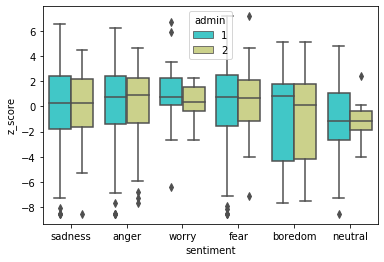

In [49]:
sns.boxplot(x='sentiment',y='sum',data=xx,hue='admin',palette='rainbow')
plt.ylabel('z_score')

Text(0, 0.5, 'z_score')

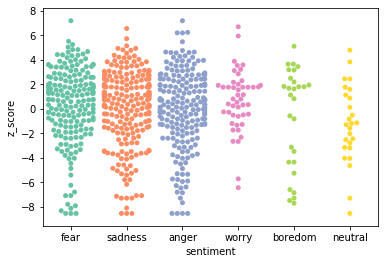

In [50]:
sns.swarmplot(x='sentiment',y='sum',data=df,palette='Set2')
plt.ylabel('z_score')

do the same with activity and risk-score

In [51]:
activity=pd.read_csv('SET_S6b_Activities_Categorized.csv')

In [52]:
activity=activity.drop(columns = "Unnamed: 0")

In [53]:
activity=activity.rename(columns={'GRYD_ETO_ID':'gangid'})
activity=activity.dropna()

In [54]:
activity_new = pd.DataFrame(activity.Categorized_Activities.str.split(', ').tolist(), index=activity.gangid).stack()
activity_new = activity_new.reset_index([0, 'gangid'])
activity_new.columns = ['gangid', 'categorized_activity']
activity_new.head()

,gangid,categorized_activity
0,BVCB-0-144-1,sports
1,BVCB-0-174-1,sports
2,Southeast 3-10-24-1,volunteer
3,Southeast 3-10-18-1,art
4,Southeast 3-10-17-1,art


In [55]:
merged_new = pd.merge(left=activity_new, right=risk, left_on='gangid', right_on='gangid')

Text(0, 0.5, 'z_score')

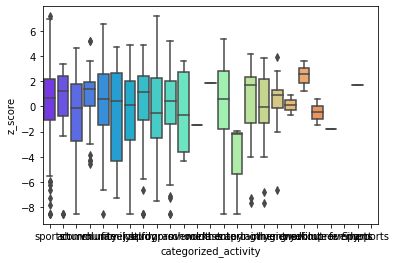

In [56]:
sns.boxplot(x='categorized_activity',y='sum',data=merged_new,palette='rainbow')
plt.ylabel('z_score')

!!!!!!!!!!!!!!! too many actvities, re-grouping

In [57]:
contents=merged_new['categorized_activity'].dropna().values
freq = nltk.FreqDist(contents)
freq

FreqDist({'sports': 206, 'job': 143, 'selfimprovement': 104, 'program': 102, 'study': 83, 'church': 75, 'volunteer': 69, 'community': 52, 'art': 48, 'hygiene': 39, ...})

In [58]:
from collections import Counter
plot_dict = dict(Counter(freq).most_common(50))
plot_dict

{'sports': 206,
 'job': 143,
 'selfimprovement': 104,
 'program': 102,
 'study': 83,
 'church': 75,
 'volunteer': 69,
 'community': 52,
 'art': 48,
 'hygiene': 39,
 'therapy': 37,
 'other': 37,
 'family': 26,
 'entertainment': 20,
 'school': 8,
 'tutoring': 3,
 'workout': 3,
 'gryd': 2,
 'voluteer': 2,
 'Sports': 2,
 'work': 1,
 'class': 1,
 'sefimprovement': 1,
 'femily': 1,
 'spports': 1}

In [59]:
merged_new.loc[merged_new['categorized_activity'] == 'work', 'categorized_activity'] = 'job'
merged_new.loc[merged_new['categorized_activity'] == 'Sports', 'categorized_activity'] = 'sports'
merged_new.loc[merged_new['categorized_activity'] == 'school', 'categorized_activity'] = 'study'
merged_new.loc[merged_new['categorized_activity'] == 'voluteer', 'categorized_activity'] = 'volunteer'
merged_new.loc[merged_new['categorized_activity'] == 'workout', 'categorized_activity'] = 'sports'
merged_new.loc[merged_new['categorized_activity'] == 'tutoring', 'categorized_activity'] = 'other'
merged_new.loc[merged_new['categorized_activity'] == 'community', 'categorized_activity'] = 'volunteer'
merged_new.loc[merged_new['categorized_activity'] == 'sefimprovement', 'categorized_activity'] = 'selfimprovement'
#merged_new is the final one

In [60]:
merged_new.loc[merged_new['categorized_activity'] == 'selfimprovement', 'categorized_activity'] = 'personality_improvement'

In [61]:
merged_new.loc[merged_new['categorized_activity'] == 'gryd', 'categorized_activity'] = 'program'
merged_new.loc[merged_new['categorized_activity'] == 'class', 'categorized_activity'] = 'study'
merged_new.loc[merged_new['categorized_activity'] == 'femily', 'categorized_activity'] = 'family'
merged_new.loc[merged_new['categorized_activity'] == 'sefimprovement', 'categorized_activity'] = 'selfimprovement'
merged_new.loc[merged_new['categorized_activity'] == 'spports', 'categorized_activity'] = 'sports'
merged_new.loc[merged_new['categorized_activity'] == 'hygiene', 'categorized_activity'] = 'other'

In [62]:
score=pd.read_csv('full_embeddedness.csv')
score.shape

(2765, 9)

In [63]:
act=merged_new
act=act.rename(columns={'gangid':'ID'})

In [64]:
full=pd.merge(left=score,right=act,on='ID',how='inner')

In [65]:
full

,ID,admin,age,sex,zone,gang,family,other,risk,categorized_activity,sum
0,BVCB-0-144-1,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776,sports,-7.812063
1,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419,sports,2.120676
2,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419,sports,2.965543
3,BVCB-0-174-1,1,20.0,1,22.0,2.931780,-0.597945,0.411312,NaN,sports,2.120676
4,BVCB-0-174-1,1,20.0,1,22.0,2.931780,-0.597945,0.411312,NaN,sports,2.965543
...,...,...,...,...,...,...,...,...,...,...,...
2105,Southeast 1-24-72-1,1,18.0,1,19.0,NaN,NaN,NaN,0.870485,sports,NaN
2106,Northeast-25-68-2,1,22.0,1,14.0,NaN,1.220058,NaN,3.560241,family,NaN
2107,Southwest 2-23-279-1,1,18.0,2,23.0,NaN,-0.818635,NaN,2.572766,other,NaN
2108,Northeast-25-64-1,1,16.0,1,NaN,NaN,0.584661,NaN,-4.329781,sports,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

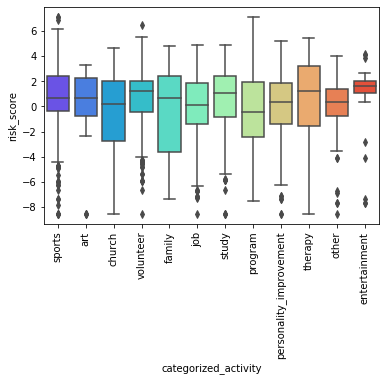

In [66]:
sns.boxplot(x='categorized_activity',y='gang',data=full,palette='rainbow')
plt.ylabel('risk_score')
plt.xticks(rotation=90)

In [67]:
contents=merged_new['categorized_activity'].dropna().values
freq = nltk.FreqDist(contents)
from collections import Counter
plot_dict = dict(Counter(freq).most_common(50))
plot_dict

{'sports': 212,
 'job': 144,
 'volunteer': 123,
 'personality_improvement': 105,
 'program': 104,
 'study': 92,
 'other': 79,
 'church': 75,
 'art': 48,
 'therapy': 37,
 'family': 27,
 'entertainment': 20}

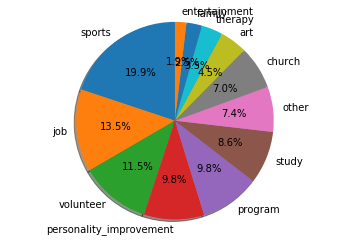

In [68]:
labels = plot_dict.keys()
sizes = plot_dict.values()


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

do the same with gender and age 

In [69]:
ag=pd.read_csv('SET_processed_latest_version.csv')

In [70]:
ag=ag.loc[:,['GRYD_ETO_ID','AGE_1_FB','SEX_1']]
ag=ag.rename(columns={'GRYD_ETO_ID':'gangid','AGE_1_FB':'age','SEX_1':'sex'})

In [71]:
ag = pd.merge(left=ag, right=risk, left_on='gangid', right_on='gangid')

In [72]:
ag.head()

,gangid,age,sex,sum
0,BVCB-0-144-1,20.0,2,-7.812063
1,BVCB-0-174-1,21.0,1,2.120676
2,BVCB-0-174-1,21.0,1,2.965543
3,BVCB-0-174-1,20.0,1,2.120676
4,BVCB-0-174-1,20.0,1,2.965543


Text(0, 0.5, 'z_score')

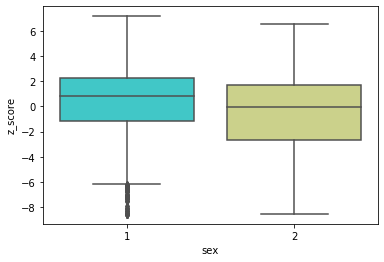

In [73]:
sns.boxplot(x='sex',y='sum',data=ag,palette='rainbow')
plt.ylabel('z_score')

In [74]:
for i in range (13,18):
    ag.loc[ag['age'] == i, 'age'] = '13-17'
    
for i in range (18,25):
    ag.loc[ag['age'] == i, 'age'] = '19-24'
    
for i in range (25,31):
    ag.loc[ag['age'] == i, 'age'] = '25-30'
    
for i in range (31,38):
    ag.loc[ag['age'] == i, 'age'] = '31-37'    

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

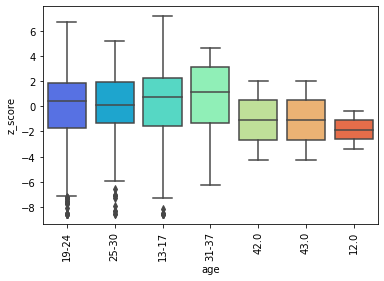

In [75]:
sns.boxplot(x='age',y='sum',data=ag,palette='rainbow')
plt.ylabel('z_score')
plt.xticks(rotation=90)

In [76]:
ag

,gangid,age,sex,sum
0,BVCB-0-144-1,19-24,2,-7.812063
1,BVCB-0-174-1,19-24,1,2.120676
2,BVCB-0-174-1,19-24,1,2.965543
3,BVCB-0-174-1,19-24,1,2.120676
4,BVCB-0-174-1,19-24,1,2.965543
...,...,...,...,...
2016,Northeast-25-68-2,19-24,1,NaN
2017,Southwest 2-23-279-1,19-24,2,NaN
2018,Southeast 1-24-85-1,19-24,1,NaN
2019,Northeast-25-64-1,13-17,1,NaN


In [107]:
text

,index,GRYD_ETO_ID,S6b_Other_Activities,S11a_Comments,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,text_all,sentiment,Emotion
0,0,BVCB-0-144-1,"Working out, CBT, boxing","School. Poor grades, car accident, not enough ...",School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,"BVCB-0-144-1,Working out, CBT, boxing,School. ...",fear,fear
1,1,BVCB-0-174-1,Basketball,Mother died,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,"BVCB-0-174-1,Basketball,Mother died,Basketball...",sadness,sadness
2,2,Southeast 3-10-24-1,Extra activities with children,Favor cousin was murder and never found his ki...,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,"Southeast 3-10-24-1,Extra activities with chil...",fear,fear
3,3,Southeast 3-10-18-1,Actor/dance,Best friend brother was murder [sic] by 16 and...,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-18-1,Actor/dance,Best friend br...",sadness,sadness
4,4,Southeast 3-10-17-1,Singing,Best fried brother was murder [sic] by 18yr boy,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-17-1,Singing,Best fried brother...",sadness,sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2749,Rampart 1-12-391-3,NaN,friends got shot,Friends,NaN,NaN,Friends,No group,NaN,NaN,"Rampart 1-12-391-3,friends got shot,Friends,Fr...",sadness,sadness
987,2750,Southeast 1-24-72-1,Wroking out playing basktball,Injured,NaN,NaN,NaN,No other group,Main street,I bang before - I dont want to do it like my o...,the people around right now are putting down I...,"Southeast 1-24-72-1,Wroking out playing basktb...",fear,fear
988,2751,Northeast-25-68-2,Spend time with family,Mom left home,NaN,NaN,NaN,No other group,Aves Plug,Not really,My son,"Northeast-25-68-2,Spend time with family,Mom l...",sadness,sadness
989,2757,Hollenbeck 3-20-298-1,"Drawing, makeup, video games",Moving back and forth,NaN,NaN,NaN,No other group,Group,No,"Yes, work, school","Hollenbeck 3-20-298-1,Drawing, makeup, video g...",fear,fear


In [109]:
emotion=text.loc[:,['GRYD_ETO_ID','sentiment']]

In [110]:
emotion

,GRYD_ETO_ID,sentiment
0,BVCB-0-144-1,fear
1,BVCB-0-174-1,sadness
2,Southeast 3-10-24-1,fear
3,Southeast 3-10-18-1,sadness
4,Southeast 3-10-17-1,sadness
...,...,...
986,Rampart 1-12-391-3,sadness
987,Southeast 1-24-72-1,fear
988,Northeast-25-68-2,sadness
989,Hollenbeck 3-20-298-1,fear


In [111]:
emotion.to_csv('emotion.csv')

In [78]:
new=pd.read_csv('prob_stra_intake_retest.csv')

In [79]:
intake = full[full['admin']==1]
retest = full[full['admin']==2]

In [80]:
intake['ID'].value_counts()

Southwest 1-15-269-1     24
Southwest 1-15-290-1     24
Southwest 1-15-298-1     24
Southwest 1-15-338-2     12
BVCB-0-129-2             12
                         ..
FGSEARE-0-52-1            1
Hollywood-12-78-2         1
Rampart 2-12-224-2        1
Southeast 2-20-140-1      1
Hollenbeck 3-20-267-1     1
Name: ID, Length: 447, dtype: int64

In [81]:
retest = retest.drop_duplicates(subset = ["ID"])
len(retest)

207

In [82]:
intake = intake.drop_duplicates(subset = ["ID"])
len(intake)

447

In [83]:
ids = retest['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
intake = intake[intake['ID'].isin(unique_ids)]
len(intake)

175

In [84]:
ids = intake['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
len(unique_ids)
retest = retest[retest['ID'].isin(unique_ids)]
len(retest)

175

In [85]:
new = intake.append(retest)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

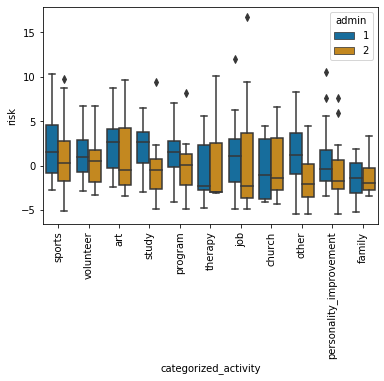

In [86]:
sns.boxplot(y='risk', x='categorized_activity', data=new, palette="colorblind",hue='admin')
plt.xticks(rotation=90)
